<a href="https://colab.research.google.com/github/Viktory4121/MME/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

#Пункт 1

In [2]:
%%R
library(datasets)
data <- airquality
head(data)

  Ozone Solar.R Wind Temp Month Day
1    41     190  7.4   67     5   1
2    36     118  8.0   72     5   2
3    12     149 12.6   74     5   3
4    18     313 11.5   62     5   4
5    NA      NA 14.3   56     5   5
6    28      NA 14.9   66     5   6


#Пункт 2


In [3]:
%%R
print("Кол-во строк:")
print(nrow(data))
print("Кол-во столбцов:")
print(ncol(data))

[1] "Кол-во строк:"
[1] 153
[1] "Кол-во столбцов:"
[1] 6


In [4]:
%%R
print("Kоличество непустых строк:")
nrow(na.omit(data))

[1] "Kоличество непустых строк:"
[1] 111


In [5]:
%%R
print("Kоличество строк, имеющих пропусkи одновременно в столбцах Ozone и Solar.R:")
nrow(data[data$Ozone %in% NA & data$Solar.R %in% NA,1:2])

[1] "Kоличество строк, имеющих пропусkи одновременно в столбцах Ozone и Solar.R:"
[1] 2


In [6]:
%%R
print("Статистика по первым четырём столбцам:")
summary(data[,1:4])

[1] "Статистика по первым четырём столбцам:"
     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       


In [7]:
%%R
print("Среднее значение столбца 'Solar.R' для 5го месяца:")
mean(data[data$Month == 5, "Solar.R"], na.rm=TRUE)

[1] "Среднее значение столбца 'Solar.R' для 5го месяца:"
[1] 181.2963


#Пункт 3

In [8]:
%%R
meanAir <- function(factor, data, tMin, tMax){
    return (mean(data[data$Temp >= tMin & data$Temp <= tMax, factor], na.rm=TRUE))
}

print("Среднее значение по фактору 'Ozone' при температуре от 60 до 80:")
print(meanAir("Ozone", data, 60, 80))
print("Среднее значение по фактору 'Solar.R' при температуре от 60 до 80:")
print(meanAir("Solar.R", data, 60, 80))
print("Среднее значение по фактору 'Wind' при температуре от 60 до 80:")
print(meanAir("Wind", data, 60, 80))

[1] "Среднее значение по фактору 'Ozone' при температуре от 60 до 80:"
[1] 23.77586
[1] "Среднее значение по фактору 'Solar.R' при температуре от 60 до 80:"
[1] 173.9733
[1] "Среднее значение по фактору 'Wind' при температуре от 60 до 80:"
[1] 10.81299


#Пункт 4

In [9]:
%%R
print("Средние значения по 'Solar.R' для каждого месяца:")
tapply(data$Solar.R, data$Month, mean, na.rm=TRUE)

[1] "Средние значения по 'Solar.R' для каждого месяца:"
       5        6        7        8        9 
181.2963 190.1667 216.4839 171.8571 167.4333 


#Пункт 5

In [10]:
%%R
maxTemp <- function(data, days = 1){
    df <- data
    df <- df[order(df$Temp, na.last = TRUE, decreasing = TRUE),]
    
    return(df[1:days,5:6])
}
print("Указанного кол-ва пары месяц/день, когда была максимальная температура:")
maxTemp(data, 5)

[1] "Указанного кол-ва пары месяц/день, когда была максимальная температура:"
    Month Day
120     8  28
122     8  30
121     8  29
123     8  31
42      6  11


#Пункт 6

In [15]:
%%R
testSet <- function(data, perc = 20){
    try(if(perc > 100 | perc < 0) stop("variable 'perc' goes beyond the range [0;100]"))

    #количество строк, которые следует случайно удалить:
    sum_row <- nrow(data) - round(nrow(data) * perc/100.0) 
    df <- data

    #генерация индексов строк, которые будут удалены:
    index <- sample(1:nrow(df), sum_row, replace=F) 
    
    #удаление строк с указанными индексами:
    df <- df[-c(index),] 
    return(df)
}
print("Тестовая выборка:")
testSet(data)

[1] "Тестовая выборка:"
    Ozone Solar.R Wind Temp Month Day
14     14     274 10.9   68     5  14
20     11      44  9.7   62     5  20
24     32      92 12.0   61     5  24
27     NA      NA  8.0   57     5  27
38     29     127  9.7   82     6   7
41     39     323 11.5   87     6  10
44     23     148  8.0   82     6  13
46     NA     322 11.5   79     6  15
54     NA      91  4.6   76     6  23
55     NA     250  6.3   76     6  24
60     NA      31 14.9   77     6  29
61     NA     138  8.0   83     6  30
72     NA     139  8.6   82     7  11
73     10     264 14.3   73     7  12
79     61     285  6.3   84     7  18
81     63     220 11.5   85     7  20
86    108     223  8.0   85     7  25
87     20      81  8.6   82     7  26
92     59     254  9.2   81     7  31
101   110     207  8.0   90     8   9
104    44     192 11.5   86     8  12
123    85     188  6.3   94     8  31
125    78     197  5.1   92     9   2
126    73     183  2.8   93     9   3
133    24     259  9.7   7

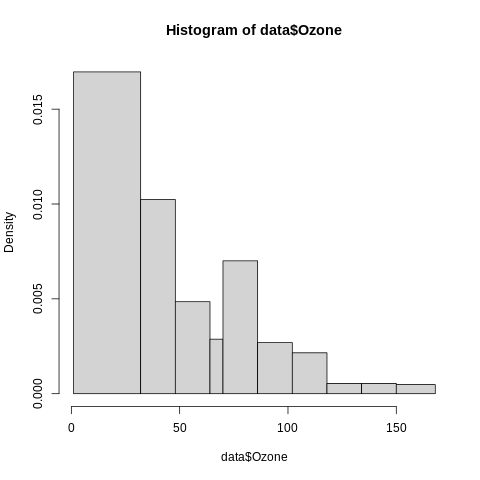

In [56]:
%%R
hist(data$Ozone, breaks = c(1,32,48,64,70,86,102,118,134,150,168))